## PCA with Supervised Algorithms

### Imports

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# plt.style.use('classic')
sns.set_style("white")

### Data

In [56]:
df = pd.read_csv("Wine.csv")

In [57]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [58]:
df.shape

(178, 14)

In [59]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [60]:
df.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<AxesSubplot:>

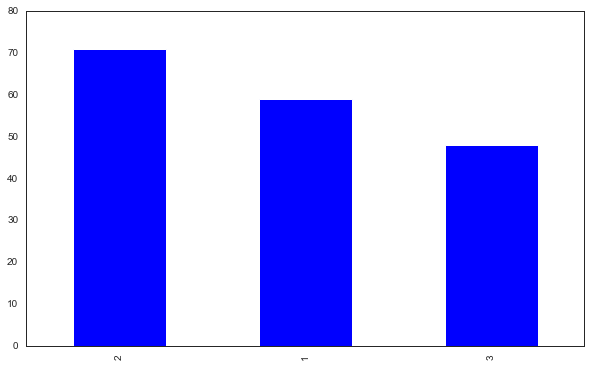

In [61]:
df.Customer_Segment.value_counts().plot.bar()

In [62]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

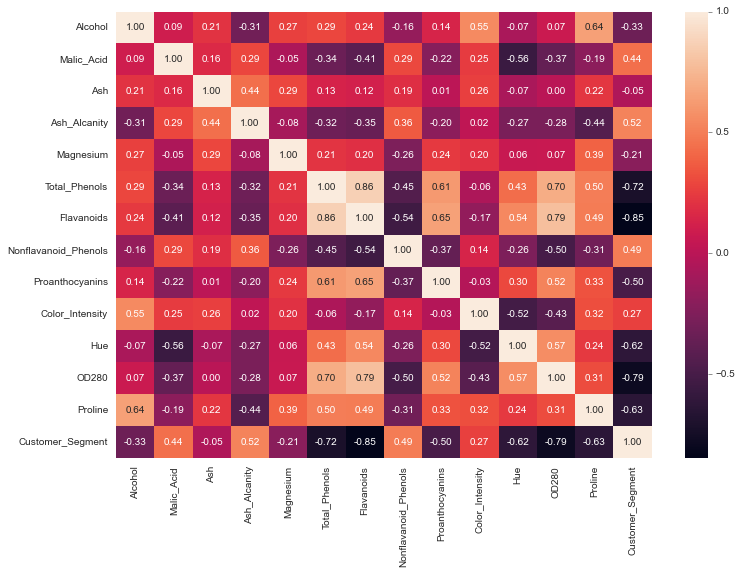

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

<AxesSubplot:>

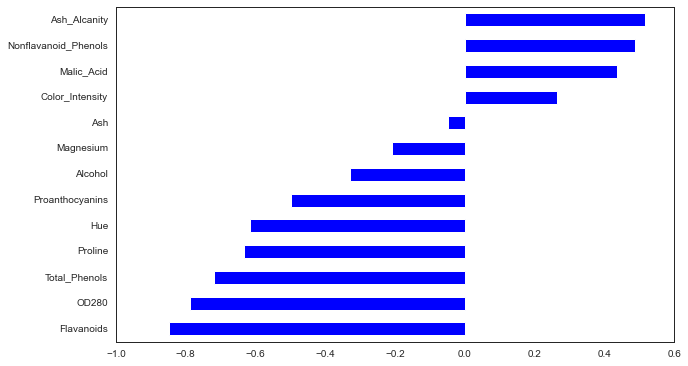

In [64]:
df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")

In [65]:
df.isnull().sum().any()

False

### Train Test Split

In [66]:
X = df.drop("Customer_Segment", axis = 1)

In [67]:
y = df["Customer_Segment"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

### Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = classifier.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [76]:
classifier.feature_importances_

array([0.12930939, 0.02858818, 0.01005337, 0.02107876, 0.02670528,
       0.04826478, 0.17041694, 0.01237242, 0.01801449, 0.17606478,
       0.06869346, 0.09987653, 0.19056163])

In [77]:
feats = pd.DataFrame(index=df.iloc[:,:-1].columns,
                     data= classifier.feature_importances_, 
                     columns=['Importance'])
feats

,Importance
Alcohol,0.129309
Malic_Acid,0.028588
Ash,0.010053
Ash_Alcanity,0.021079
Magnesium,0.026705
Total_Phenols,0.048265
Flavanoids,0.170417
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Color_Intensity,0.176065


In [78]:
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Ash,0.010053
Nonflavanoid_Phenols,0.012372
Proanthocyanins,0.018014
Ash_Alcanity,0.021079
Magnesium,0.026705
Malic_Acid,0.028588
Total_Phenols,0.048265
Hue,0.068693
OD280,0.099877
Alcohol,0.129309


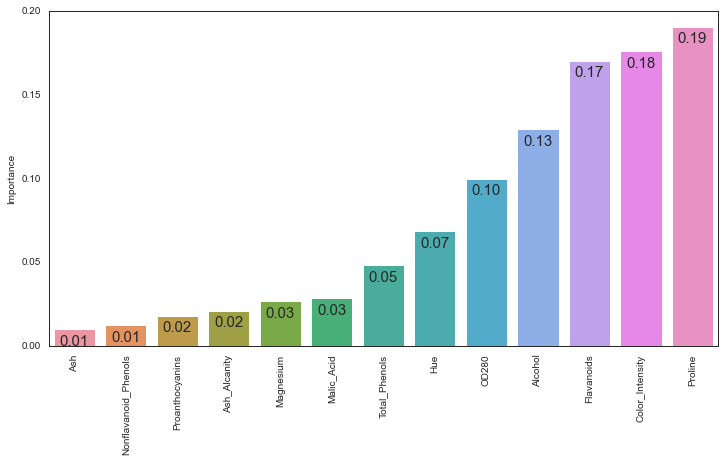

In [79]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),
                    x=imp_feats.sort_values('Importance').index,
                    y='Importance')
plt.xticks(rotation=90)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Remodelling by feature importance

In [80]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

In [81]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 0)

In [82]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [83]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=0)

In [84]:
y_pred2 = classifier2.predict(X_test2)

In [85]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### PCA

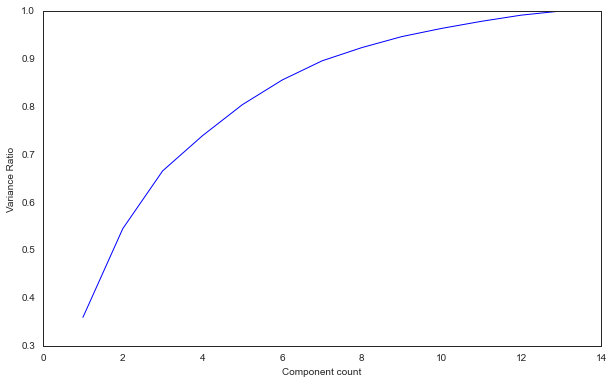

In [86]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
x = range(1,14)

plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [87]:
pca = PCA(n_components=13).fit(X_train)

In [88]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [89]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.706713,0.359505,0.359505
2,2.428244,0.185473,0.544978
3,1.580507,0.120721,0.665699
4,0.964060,0.073636,0.739335
5,0.848632,0.064820,0.804155
6,0.675462,0.051593,0.855748
7,0.524426,0.040056,0.895804
8,0.363173,0.027740,0.923544
9,0.300204,0.022930,0.946474
10,0.224731,0.017165,0.963639


In [90]:
pca = PCA(n_components = 3) # 0.75

In [91]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [92]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_train.head()

,first_component,second_component,third_component
0,-0.783937,-1.590432,0.568115
1,-1.792083,0.583400,-1.321347
2,2.101051,2.109598,0.790712
3,3.107242,0.448619,-1.057832
4,0.725718,-2.107998,0.588435


In [93]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_test.head()

,first_component,second_component,third_component
0,0.510682,-1.703429,0.476175
1,-1.431099,0.675556,0.335034
2,1.517576,-1.098461,-1.110562
3,-2.504356,1.651059,-0.292180
4,-0.335949,-2.097911,-2.503081


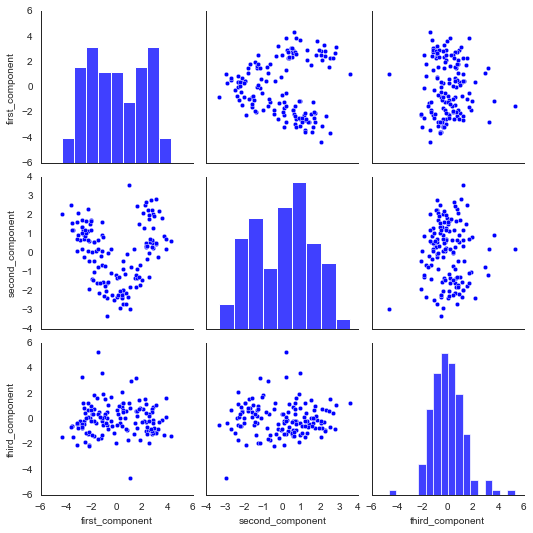

In [94]:
sns.pairplot(df_pca_train)

In [95]:
df_pca_train.corr().round()

,first_component,second_component,third_component
first_component,1.0,0.0,-0.0
second_component,0.0,1.0,-0.0
third_component,-0.0,-0.0,1.0


### Modelling after PCA

In [96]:
classifier3 = RandomForestClassifier(random_state = 0)
classifier3.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=0)

In [97]:
y_pred = classifier3.predict(X_test_pca)
confusion_matrix(y_test, y_pred)

array([[11,  1,  0],
       [ 1, 13,  0],
       [ 0,  0, 10]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



### Interpreting PCA results

In [99]:
scaled_df = pd.DataFrame(X_train, columns = df.columns[:-1])

In [100]:
combined_df = pd.concat([df_pca_train, scaled_df], axis=1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,third_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,1.662970e-16,-2.759169e-16,-0.315917,0.522374,-0.041560,0.457484,-0.297626,-0.858881,-0.910155,0.647516,-0.661573,0.157077,-0.703526,-0.796406,-0.651453
second_component,1.662970e-16,1.000000e+00,-3.215413e-18,0.759174,0.314529,0.481679,-0.033691,0.471424,0.089916,-0.016412,0.122430,0.060781,0.847400,-0.340077,-0.332120,0.556237
third_component,-2.759169e-16,-3.215413e-18,1.000000e+00,-0.250287,0.138850,0.764486,0.798863,0.165145,0.186767,0.187314,0.162821,0.177221,-0.138940,0.042489,0.218051,-0.202532
Alcohol,-3.159174e-01,7.591742e-01,-2.502869e-01,1.000000,0.086124,0.201450,-0.315958,0.249971,0.287509,0.224431,-0.089860,0.123973,0.541419,0.040125,0.023660,0.652054
Malic_Acid,5.223736e-01,3.145289e-01,1.388497e-01,0.086124,1.000000,0.123963,0.272138,-0.071824,-0.313270,-0.384919,0.328954,-0.201117,0.203619,-0.534350,-0.365818,-0.216060


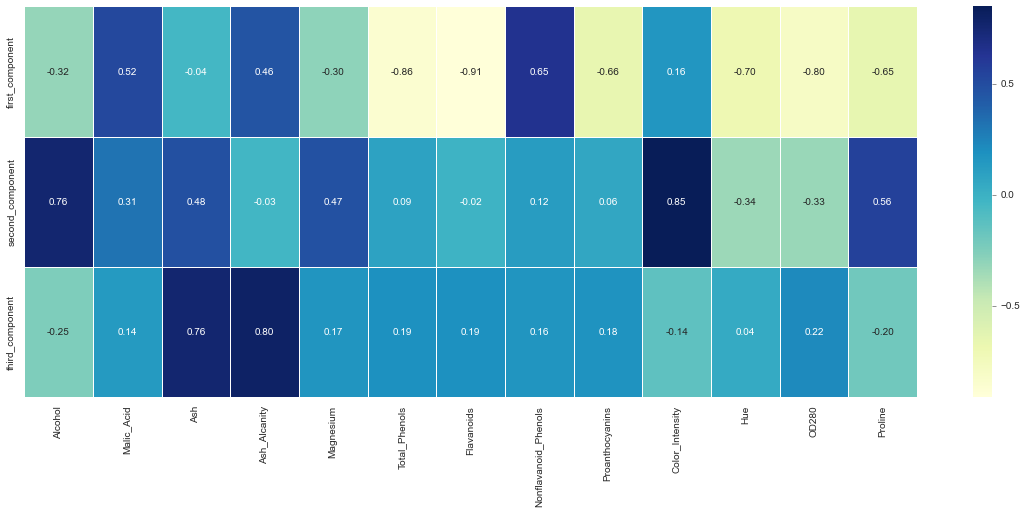

In [101]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:3,3:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<AxesSubplot:>

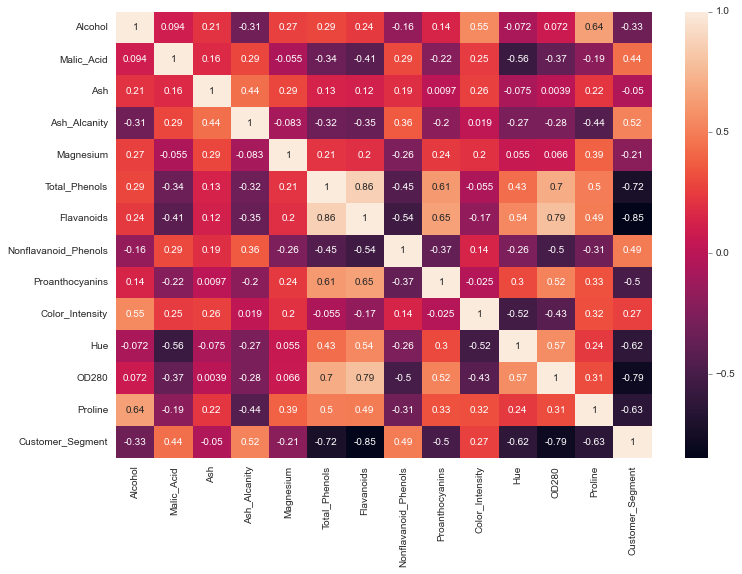

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='first_component', ylabel='second_component'>

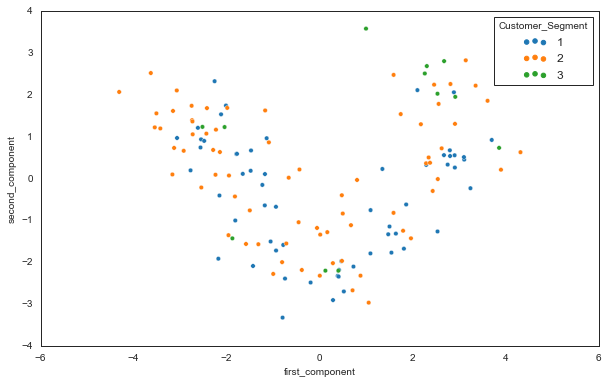

In [103]:
sns.scatterplot(x = df_pca_train["first_component"],
                y= df_pca_train["second_component"],
                hue=df.Customer_Segment, 
                palette="tab10")

In [104]:
import plotly.express as px

fig = px.scatter_3d(x=df_pca_train["first_component"],
                    y=df_pca_train["second_component"], 
                    z=df_pca_train["third_component"],
                    color=y_train)
fig.show()

### n_components = float numbers

In [105]:
pca = PCA(n_components= 0.7)

In [106]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [107]:
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.706713,0.359505,0.359505
2,2.428244,0.185473,0.544978
3,1.580507,0.120721,0.665699
4,0.964060,0.073636,0.739335
5,0.848632,0.064820,0.804155
6,0.675462,0.051593,0.855748
7,0.524426,0.040056,0.895804
8,0.363173,0.027740,0.923544
9,0.300204,0.022930,0.946474
10,0.224731,0.017165,0.963639


In [108]:
pd.DataFrame(X_train_pca)

,0,1,2,3
0,-0.783937,-1.590432,0.568115,0.039495
1,-1.792083,0.583400,-1.321347,-0.527003
2,2.101051,2.109598,0.790712,-0.591235
3,3.107242,0.448619,-1.057832,0.473768
4,0.725718,-2.107998,0.588435,-0.829437
...,...,...,...,...
137,-2.045510,1.227113,-0.145378,0.454249
138,0.121802,-2.205476,0.416123,0.900553
139,3.858038,0.730102,1.680517,0.745829
140,0.995597,3.578715,1.221165,1.411933
